The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

Attribute Information:

1)	FRESH: annual spending (m.u.) on fresh products (Continuous); 

2)	MILK: annual spending (m.u.) on milk products (Continuous); 

3)	GROCERY: annual spending (m.u.)on grocery products (Continuous); 

4)	FROZEN: annual spending (m.u.)on frozen products (Continuous) 

5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 

6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 

7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 

8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 
Descriptive Statistics: 

Source: UCI Wholesale customers Data Set (https://archive.ics.uci.edu/ml/datasets/wholesale+customers)

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


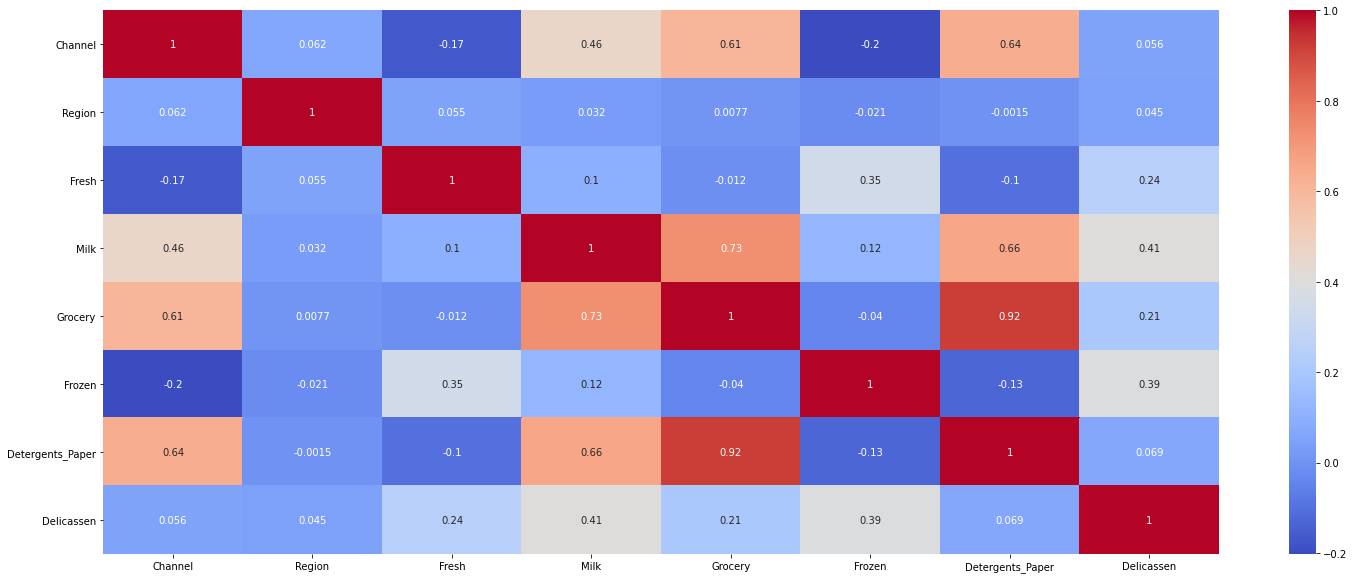

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax) = plt.subplots(1, 1, figsize=(25,10))
sns.heatmap(df.corr(), ax=ax,cmap="coolwarm",annot=True)

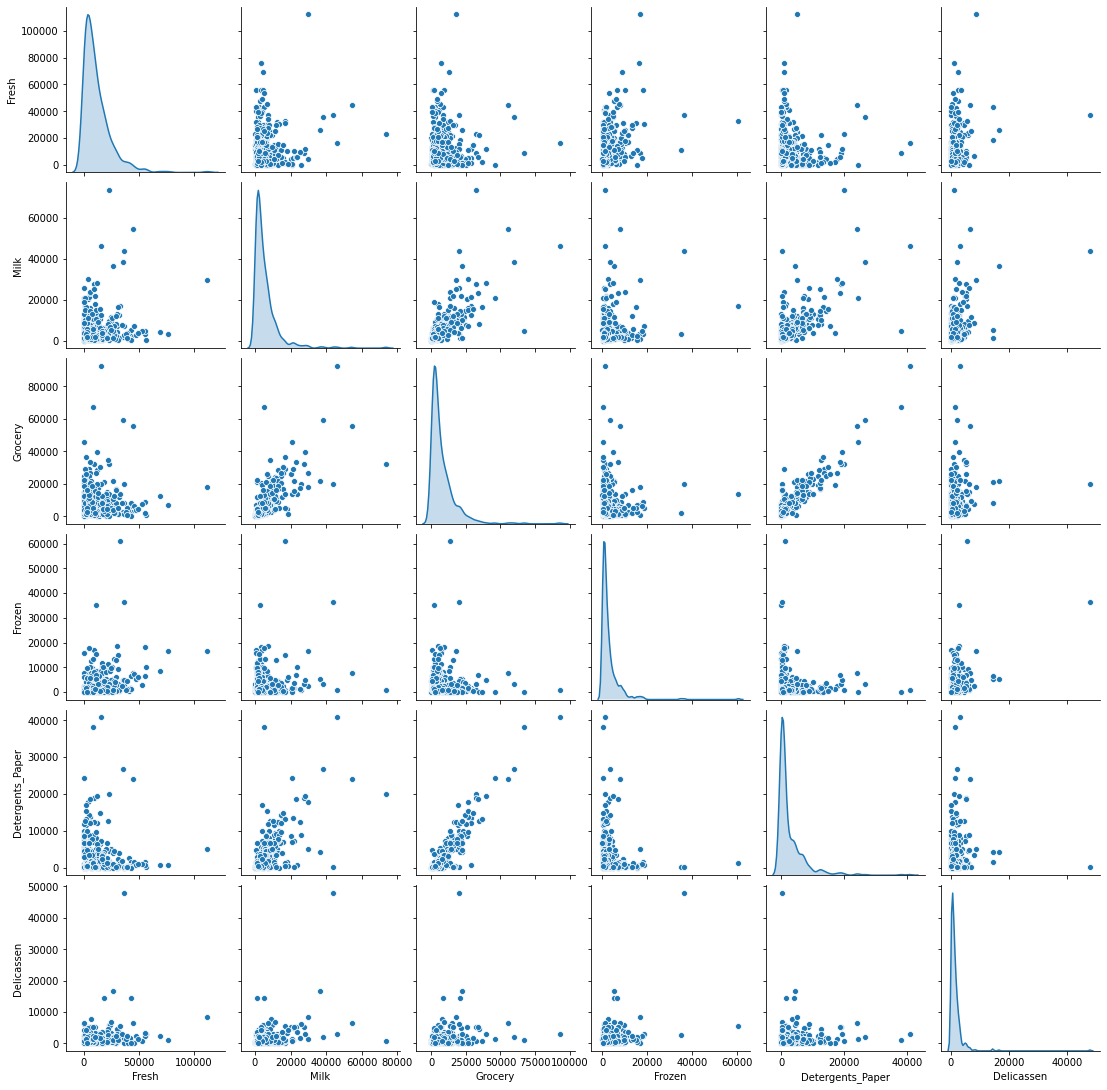

In [6]:
import seaborn as sns
sns.pairplot(df.iloc[:,[2,3,4,5,6,7]],diag_kind='kde')

In [7]:
for col in ['Channel','Region']:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)
df    

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1,0,0,0,1
436,39228,1431,764,4510,93,2346,1,0,0,0,1
437,14531,15488,30243,437,14841,1867,0,1,0,0,1
438,10290,1981,2232,1038,168,2125,1,0,0,0,1


In [0]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1,15):
    km = KMeans(n_clusters=k,random_state=0,n_init=20)
    km = km.fit(df)
    inertia.append(km.inertia_)

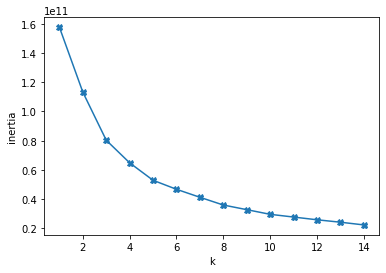

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1,15), inertia, 'X-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [0]:
km=KMeans(n_clusters=5,random_state=0,n_init=20)
km.fit(df)
prediction=km.predict(df)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pc = pca.fit_transform(df)
clusters=pd.DataFrame(pc,columns=['pc1','pc2'])
clusters['cluster']=prediction

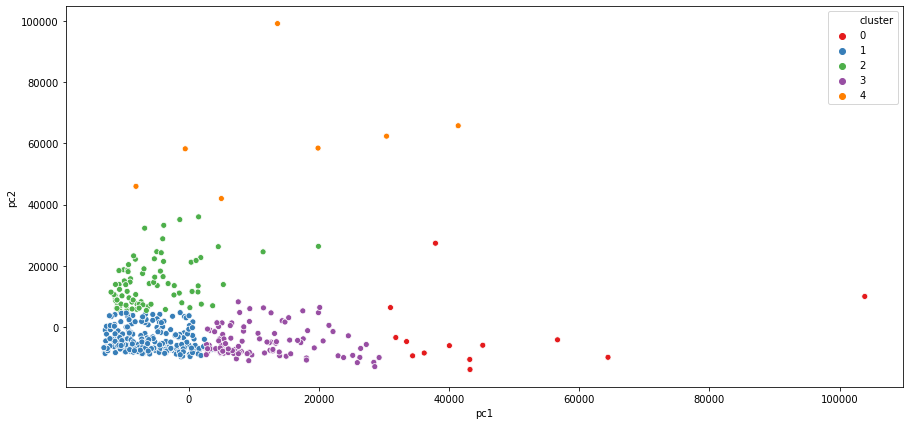

In [12]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='pc1', y='pc2', hue= 'cluster', data=clusters,palette='Set1')
plt.show()